In [845]:
#imports
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

In [846]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [953]:
#Reading Chicago files
df_Chi_1 = pd.read_csv('Chicago_1.csv',names=['Date','Stars','Title','Review'])
df_Chi_2 = pd.read_csv('Chicago_2.csv',names=['Date','Stars','Title','Review'])
df_Chi_3 = pd.read_csv('Chicago_3.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_Chi_4 = pd.read_csv('Chicago_4.csv',names=['Date','Stars','Title','Review'])
df_Chi_5 = pd.read_csv('Chicago_5.csv',names=['Date','Stars','Title','Review'])
df_Chi_6 = pd.read_csv('Chicago_6.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_Chi_7 = pd.read_csv('Chicago_7.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_Chi_8 = pd.read_csv('Chicago_8.csv',names=['Date','Stars','Title','Review'])
df_Chi_9 = pd.read_csv('Chicago_9.csv',names=['Date','Stars','Title','Review'])
df_Chi_10 = pd.read_csv('Chicago_10.csv',names=['Date','Stars','Title','Review'])


In [954]:
#Reading Austin files
df_Aus_1 = pd.read_csv('Austin_1.csv',names=['Date','Stars','Title','Review'])
df_Aus_2 = pd.read_csv('Austin_2.csv',names=['Date','Stars','Title','Review'])
df_Aus_3 = pd.read_csv('Austin_3.csv',names=['Date','Stars','Title','Review'])
df_Aus_4 = pd.read_csv('Austin_4.csv',names=['Date','Stars','Title','Review'])
df_Aus_5 = pd.read_csv('Austin_5.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_Aus_6 = pd.read_csv('Austin_6.csv',names=['Date','Stars','Title','Review'])
df_Aus_7 = pd.read_csv('Austin_7.csv',names=['Date','Stars','Title','Review'])
df_Aus_8 = pd.read_csv('Austin_8.csv',names=['Date','Stars','Title','Review'])
df_Aus_9 = pd.read_csv('Austin_9.csv',names=['Date','Stars','Title','Review'])
df_Aus_10 = pd.read_csv('Austin_10.csv',names=['Date','Stars','Title','Review'])


In [955]:
#reading NYC files
df_NYC_1 = pd.read_csv('NY_1.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_2 = pd.read_csv('NY_2.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_3 = pd.read_csv('NY_3.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_4 = pd.read_csv('NY_4.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_5 = pd.read_csv('NY_5.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_6 = pd.read_csv('NY_6.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_7 = pd.read_csv('NY_7.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_8 = pd.read_csv('NY_8.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_9 = pd.read_csv('NY_9.csv',names=['Date','Stars','Title','Review'],index_col=False)
df_NYC_10 = pd.read_csv('NY_10.csv',names=['Date','Stars','Title','Review'],index_col=False)

In [956]:
#create list of Chicago attractions:
l_Chi=[df_Chi_1, df_Chi_2,df_Chi_3,df_Chi_4,df_Chi_5,df_Chi_6,df_Chi_7,df_Chi_8,df_Chi_9,df_Chi_10]



In [957]:
#create list of Austin Attractions
l_Aus=[df_Aus_1,df_Aus_2,df_Aus_3,df_Aus_4,df_Aus_5,df_Aus_6,df_Aus_7,df_Aus_8,df_Aus_9,df_Aus_10]

In [958]:
#create list of NYC Attractions
l_NYC=[df_NYC_1, df_NYC_2,df_NYC_3,df_NYC_4,df_NYC_5,df_NYC_6,df_NYC_7,df_NYC_8,df_NYC_9,df_NYC_10]

In [959]:
l_Aus[1]

,Date,Stars,Title,Review
0,"['Oct', '2021']",5.0,Experience Nature in an Urban Setting,A great way to experience nature in an urban setting. Nice views of the Austin skyline across the Colorado River. Name is confusing as it is also referred to the Ann and Roy Butler Hike and Bike Trail on maps. Rented a couple e-bikes and headed from our downtown hotel across the Pfluger Pedestrian Bridge and covered a lot of ground making for a relaxing and enjoyable morning. Rode up and down the south side of the river and along Barton Creek.
1,"['Jun', '2021']",5.0,Beautiful trail!,Beautiful trail. Places to sit and look at the water. Very busy on the weekends but during the week much calmer. Pack your water bottle and hit the trail!
2,"['Apr', '2022']",5.0,Lovely and scenic walk,"My friend and I wanted to check out Lady Bird Lake and get exercise at the same time. There was a relatively small area that offered free 2-hour parking near the Hyatt Regency on the lake’s south side. All the trees along the trail provided a lot of shade , welcome on a sunny and warm day. This is a terrific way to take in the Austin scene."
3,"['Mar', '2022']",5.0,Nice outdoor walk with views,Nice to get some outside time on our Austin visit. Included a walk to the Congress Ave Bridge to see the bats come out at sunset.
4,"['Apr', '2022']",5.0,Beautiful,On a hot day it is a beautiful walk and great people watching. Not a lot of nature but the fauna is nice and the paths are clean and seem safe
...,...,...,...,...
615,"['Sep', '2017']",5.0,Perfect for a walk,Great area to go for a walk. Lake is so relaxing and fun to watch the people kayaking on it. Favorite time is when the sun is setting.
616,"['Aug', '2017']",5.0,More than a place of exercise,"When I first got to the lake for the walk it seemed overwhelming. When I began the walk I realized that along with the natural paths and the views of the city skyline you didn't feel nor realize the number of miles you covered. Even walking along the highway, as they got ready for the 'bat fest' it was awesome."
617,"['Sep', '2016']",5.0,Great day on the lake,"Safe place for outside fun with friends and family. Canoeing, kayaking, boating and surf boards are just some of the activities you can do on Lady Bird. It's a beautiful lake and has great views and hiking trails. Be careful where you step. Not everyone cleans up after their dog."
618,"['Jun', '2017']",5.0,Fun Walk,This is one of my favorite places to walk in Austin. There are great scenic views and beautiful surroundings to look at.


In [960]:
#Feature Engineering
#drop reviews without date in Chicago data
for i in range(0,len(l_Chi)):
    l_Chi[i]=l_Chi[i].dropna()
    

In [961]:
#drop reviews without date in Austin data
for i in range(0,len(l_Aus)):
    l_Aus[i]=l_Aus[i].dropna()

In [962]:
#drop reviews without date in NYC data
for i in range(0,len(l_NYC)):
    l_NYC[i]=l_NYC[i].dropna()

In [975]:
#procedure that creates columns for month and year  dataframes
def month_year(l):
    for j in range(0,len(l)):
        l[j]['Month']=0
        l[j]['Year']=0
        for i in range(0,len(l[j])):

            l[j]['Date'].iloc[i]=str(l[j]['Date'].iloc[i])
            if len(l[j]['Date'].iloc[i])!=0:
                l[j]['Month'].iloc[i]=l[j]['Date'].iloc[i][2:5]
                l[j]['Year'].iloc[i]=l[j]['Date'].iloc[i][-6:-2]

In [976]:
month_year(l_Chi)

In [977]:
month_year(l_Aus)
month_year(l_NYC)

In [988]:
#resetting index
for i in range(0,len(l_Chi)):
    l_Chi[i]=l_Chi[i].reset_index(drop=True)
for i in range(0,len(l_Aus)):
    l_Aus[i]=l_Aus[i].reset_index(drop=True)
for i in range(0,len(l_NYC)):
    l_NYC[i]=l_NYC[i].reset_index(drop=True)


In [989]:
l_Chi[0].head(5)

,Date,Stars,Title,Review,Month,Year
0,"['Apr', '2022']",5.0,Great visit to world famous art museum,"Visited the last Monday in April. We arrived at the 11am opening and spent 6 hours there until just before 5pm as we viewed the countless exhibits in each room on every floor - even then, we didn't have nearly enough time to read everything. There are 4 floors including the lower level where the Arts of Egypt displays are located. The Art Institute has the most impressionist works of art outside of Paris, so you must visit this place if you enjoy art and it's history. Unlike some other art museums, the Art Institute allows to get closer to the exhibits in order to properly view them and the lighting was sufficient. I don't believe they allowed backpacks, so we stepped outside briefly to have a snack and drink a bottle of water. It wasn't as crowded as I thought it would be and we were able to walk around without difficulty. They allow photographs, but ask that you not use flash, selfie stick, tripods or video. We used our Citypass tickets to get in which save us on the cost of admission. If you only have one day to visit, I recommend going early because there is really a LOT to see.",Apr,2022
1,"['May', '2022']",5.0,Terrific must-se,"One of the very best in US, if not the world! Very pleasant spaces, lighting. Incredible collection. Worth all the time you can spare. Good shop too.",May,2022
2,"['Apr', '2022']",5.0,A world of beauty,Prepared to move from one jaw dropping gallery to another. All the paintings you studied in Art Appreciation plus a few hundred more are here. I could wander here for hours. I will add that it is very easy to get lost but every staff member we had to ask directions from was very helpful. I cannot wait to make another visit here.,Apr,2022
3,"['Apr', '2022']",5.0,Great collection of Art!,"While the Art Institute of Chicago may not be the Louvre, it has a very respectable collection of diverse art in huge, uncluttered galleries. I'm sure one can spend days on end enjoying the many pieces but the brochures have a nice list of art a visitor with limited time can see.",Apr,2022
4,"['May', '2022']",5.0,Not enough hours in a day to visit it all.,Great collections and displays of art. Staff was cordial and respectful. From the ticket booth til the end was very organized and clean.,May,2022


In [990]:
#calculate sentiment using VADER
analyzer = SentimentIntensityAnalyzer()
def sentiment_calc(df):
    for i in range(0,len(df)):
        df[i]['vader_score'] = df[i].Review.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))

In [991]:
sentiment_calc(l_Aus)
sentiment_calc(l_Chi)
sentiment_calc(l_NYC)

In [993]:
l_Chi[0]

,Date,Stars,Title,Review,Month,Year,vader_score
0,"['Apr', '2022']",5.0,Great visit to world famous art museum,"Visited the last Monday in April. We arrived at the 11am opening and spent 6 hours there until just before 5pm as we viewed the countless exhibits in each room on every floor - even then, we didn't have nearly enough time to read everything. There are 4 floors including the lower level where the Arts of Egypt displays are located. The Art Institute has the most impressionist works of art outside of Paris, so you must visit this place if you enjoy art and it's history. Unlike some other art museums, the Art Institute allows to get closer to the exhibits in order to properly view them and the lighting was sufficient. I don't believe they allowed backpacks, so we stepped outside briefly to have a snack and drink a bottle of water. It wasn't as crowded as I thought it would be and we were able to walk around without difficulty. They allow photographs, but ask that you not use flash, selfie stick, tripods or video. We used our Citypass tickets to get in which save us on the cost of admission. If you only have one day to visit, I recommend going early because there is really a LOT to see.",Apr,2022,0.8715
1,"['May', '2022']",5.0,Terrific must-se,"One of the very best in US, if not the world! Very pleasant spaces, lighting. Incredible collection. Worth all the time you can spare. Good shop too.",May,2022,0.9254
2,"['Apr', '2022']",5.0,A world of beauty,Prepared to move from one jaw dropping gallery to another. All the paintings you studied in Art Appreciation plus a few hundred more are here. I could wander here for hours. I will add that it is very easy to get lost but every staff member we had to ask directions from was very helpful. I cannot wait to make another visit here.,Apr,2022,0.8012
3,"['Apr', '2022']",5.0,Great collection of Art!,"While the Art Institute of Chicago may not be the Louvre, it has a very respectable collection of diverse art in huge, uncluttered galleries. I'm sure one can spend days on end enjoying the many pieces but the brochures have a nice list of art a visitor with limited time can see.",Apr,2022,0.7874
4,"['May', '2022']",5.0,Not enough hours in a day to visit it all.,Great collections and displays of art. Staff was cordial and respectful. From the ticket booth til the end was very organized and clean.,May,2022,0.8768
...,...,...,...,...,...,...,...
722,"['Aug', '2019']",5.0,Amazing,"It is obviously an amazing place to visit if you appreciate art, but I think anyone could find something to love about this museum. Everyone who comes through Chicago should make time in their schedule for a visit.",Aug,2019,0.8765
723,"['Sep', '2019']",5.0,Stunning collection,Really worth the trip. We thoroughly enjoyed browsing. The layout is a bit complex but be sure to see every gallery. There are treasures in each. Museum cafe is excellent. Nice break to sit and relax by the fountain in the courtyard. Staff is outstanding. Everyone was pleasant and helpful.,Sep,2019,0.9897
724,"['Aug', '2019']",5.0,Nice collection,We spent a few hours there and enjoyed it quite a bit. They have a lovely collection that is clearly organized. The staff is wonderful in kindly directing you to where you want to go and what you want to see.,Aug,2019,0.9538
725,"['Aug', '2019']",5.0,Plan a long visit!,It would take days (2-3) to properly enjoy all this place has to offer. It is massive and has an extraordinary collection. We breezed through the highlights due to limited time in our itinerary and recommend planning a longer visit.,Aug,2019,0.5859


In [994]:
#frenaming months:
def rename_month(df):
    for i in range(0,len(df)):
        if df['Month'].iloc[i]=='Jan':
            df['Month'].iloc[i]=1
        elif df['Month'].iloc[i]=='Feb':
            df['Month'].iloc[i]=2
        elif df['Month'].iloc[i]=='Mar':
            df['Month'].iloc[i]=3
        elif df['Month'].iloc[i]=='Apr':
            df['Month'].iloc[i]=4
        elif df['Month'].iloc[i]=='May':
            df['Month'].iloc[i]=5
        elif df['Month'].iloc[i]=='Jun':
            df['Month'].iloc[i]=6
        elif df['Month'].iloc[i]=='Jul':
            df['Month'].iloc[i]=7
        elif df['Month'].iloc[i]=='Aug':
            df['Month'].iloc[i]=8
        elif df['Month'].iloc[i]=='Sep':
            df['Month'].iloc[i]=9
        elif df['Month'].iloc[i]=='Oct':
            df['Month'].iloc[i]=10
        elif df['Month'].iloc[i]=='Nov':
            df['Month'].iloc[i]=11
        elif df['Month'].iloc[i]=='Dec':
            df['Month'].iloc[i]=12

In [995]:
def rename(l):
    for j in range(0,len(l)):
        rename_month(l[j])

In [996]:
rename(l_Chi)
rename(l_Aus)
rename(l_NYC)

<AxesSubplot:xlabel='Month', ylabel='vader_score'>

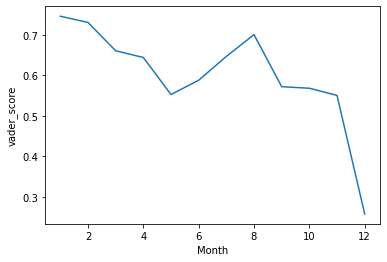

In [1000]:
#plot vader score by month for one attraction 
gpm=l_Aus[7].groupby('Month').mean()
sns.lineplot(x='Month',y='vader_score',data=gpm)

In [1001]:
#concatenate dataframes
df_Chi=pd.concat(l_Chi)


<AxesSubplot:xlabel='Month', ylabel='vader_score'>

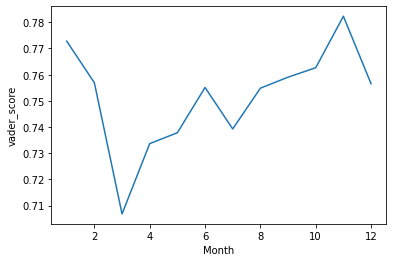

In [1002]:
#plot aggregate vader score for chicago
#df_Chi1=df_Chi[df_Chi['Year']==2021]
gpm_Chi_all=df_Chi.groupby('Month').mean()
sns.lineplot(x='Month',y='vader_score',data=gpm_Chi_all)

In [593]:
#Exploring November and March
pd.set_option('display.max_colwidth', None)
l_Chi[0][(l_Chi[0]['Month']==2) & (l_Chi[0]['vader_score']<0.8)]

,Date,Stars,Title,Review,vader_score,Month,Year
23,"['Feb', '2022']",5.0,"Moving, incredible","This is something I’m glad I got to do on my second trip to this city. Classic paintings like ‘American Gothic’ and ‘Nighthawks’amongst others (especially some of Gaguin’s Tahitian works) made this fascinating. Also, I was incredibly moved by ‘White Crucifixion’ that showed Christ’s crucifixion and had many pogroms that Jews have endured, sadly.",0.7798,2,2022
239,"['Feb', '2020']",5.0,Art Institute,Great place to visit. There is so much to see one can ever get enough of it. It is a must stop for anyone visiting Chicago.,0.4404,2,2020
243,"['Feb', '2020']",5.0,Not to be Missed,"I've lived here for many years, but just recently revisited the AI. I had forgotten just how great it is. What a treasure, even if you are not an art aficionado. There's something for everyone. And the building itself is a work of art. If you see nothing else in Chicago, see this.",0.7964,2,2020
245,"['Feb', '2020']",5.0,Iconic Museum,"The Art Institute of Chicago is one of the country's iconic art museums. Over the years, they have placed many of their most famous paintings in media, so they are familiar to a wide audience. The museum is too large to see completely in a day, so be ready for multiple trips to see it all!",0.4714,2,2020
251,"['Feb', '2020']",5.0,Could have spent all day here,Some nice surprises of famous works that I didn’t know were here. The guide section that highlights the “must sees” was very helpful,0.7778,2,2020
260,"['Feb', '2020']",5.0,Amazing Place,"Always a great escape to ancient, contemporary, and imagined worlds. Here, everyone will find some art that speaks to them.",0.7003,2,2020
265,"['Feb', '2020']",5.0,Must See for Art Enthusiasts!,"I am an art-museum nerd. If you are too, don’t go through life without spending a day here...a full day. And be well rested. This place is enormous and covers 4 levels. Go early in the day. Only a few people in line at 11 am on a Saturday. 70+ in line when I left around 2. If you’ve been to the Vatican or The Hermitage, skip the medieval wings. Do NOT skip the modern art or, believe it or not, the armory. My feet are killing me, but it was well worth it.",0.3071,2,2020


<AxesSubplot:xlabel='Month', ylabel='vader_score'>

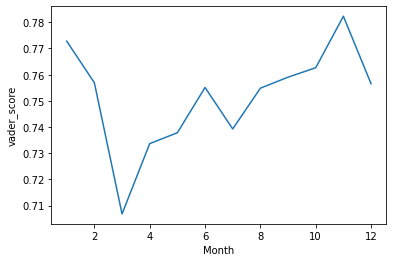

In [682]:
#plot average Stars for chicago
gpm_Chi_Stars=df_Chi.groupby('Month').mean()
sns.lineplot(x='Month',y='vader_score',data=gpm_Chi_Stars)

<function matplotlib.pyplot.show(close=None, block=None)>

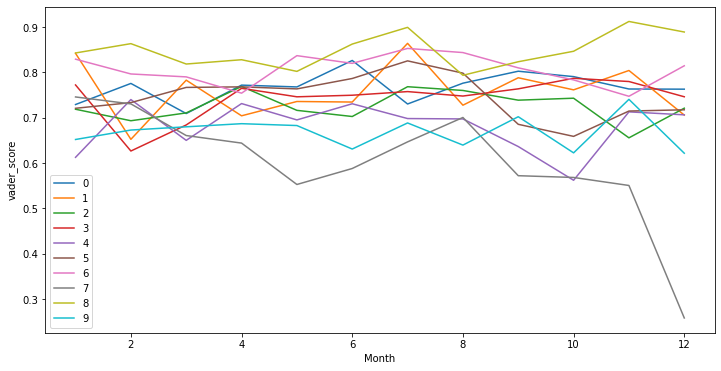

In [594]:
#plot vader score by month for one attraction (Wildflower Center)
gpm_Aus=[]
plt.figure(figsize=(12,6))
for i in range(0,len(l_Aus)):
    gpm=l_Aus[i].groupby('Month').mean()
    sns.lineplot(x='Month',y='vader_score',data=gpm,label=i)
    gpm_Aus.append(gpm)
plt.show

<AxesSubplot:xlabel='Month', ylabel='vader_score'>

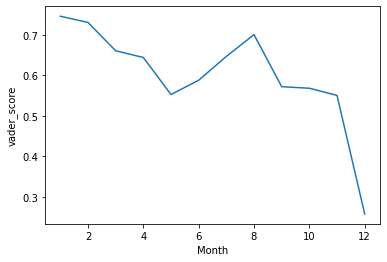

In [669]:
#plot vader score by month for one attraction (Driskill hotel)
sns.lineplot(x='Month',y='vader_score',data=gpm_Aus[7])

In [681]:
l_Chi[3][l_Chi[3]['Month']==2]

,Date,Stars,Title,Review,Month,Year,vader_score
146,"['Feb', '2021']",4.0,Why not...,When in Chicago even during a pandemic you are required to visit Millennium park and take a picture by the bean... even in a frozen February pandemic a good visit,2,2021,0.4404
147,"['Feb', '2021']",5.0,THE BEAN,Get to the bean early if you don't want a ton of tourist trying to take a picture. Right now during the winter they have a gate up so you can't get right up and under the bean. It's pretty during winter!,2,2021,0.5057
155,"['Feb', '2020']",5.0,Interesting Place,"whenever you travel to Chicago must visit there, Chicago is the best place don't miss the Chicago pizza",2,2020,0.6852
213,"['Feb', '2020']",5.0,Can’t wait to go back,"Fun, unique place to go and take a picture with a great panoramic view of the city in the background. Hopefully it will be back open and available for all to enjoy again.",2,2020,0.9231
217,"['Feb', '2020']",5.0,Chicago’s Front Yard,"What a terrific green space in Chicago! Wade and splash in the Crown Fountain area. Hang on tight while you rock climb in Maggie Daley Park. Done climbing, head to the miniature golf or large area of playground. When it gets cold you can ice skate on the Ribbon in Maggie Daley Park. Don’t forget to take pictures with you and “the bean”. Concerts are held in the Jay Pritzker Pavilion. Listen and watch under starry nights. Grab a bite to eat at the Plaza At The Park Grill. When you’ve had your fill you only steps away from Michigan Ave., The Art Institute and plenty more.",2,2020,0.3595
225,"['Feb', '2020']",5.0,Great place to visit when in Chicago!,"Once I landed in Chicago this was one of the first places I went to visit. The famous “bean” is here, skating and other fun things. Take a stroll down to this park and sit back and watch the enthusiasm from the crowd. Don’t forget to take your selfie!",2,2020,0.6800
232,"['Feb', '2020']",4.0,Giant Bean!,"It was freezing when we went to Chicago, the park had an ice rink. The park is great to walk round but I'd like to go back in the Spring / Summer to see it in the sunshine and maybe a bit of warmth",2,2020,0.9313
233,"['Feb', '2020']",5.0,Its even 'cool' when frozen,"This is never a disappointment, don't just stand there, walk into the center and look up! Someday, I'm going back when Chicago is warm.",2,2020,0.5986
237,"['Feb', '2020']",5.0,Very strange shape....,"So shiny art, it was like a mirror. It can give a lot of different views from yourself or take picture from your whole group as we did. Lot of fun.",2,2020,0.7003
244,"['Feb', '2020']",5.0,Must see in Chicago!,"This is one of my my favorite places in Chicago. At Christmas time the decorations are beautiful plus you can go ice-skating. In the warmer weather there are gardens to explore, fountains and outdoor concerts. It’s close to the lake so the views of the lake and the city are fabulous. The “bean” is something you must experience - make sure your phone is fully charged for pictures! Every time I go into Chicago, I like to stop at Millennium Park and I always bring out of town visitors there. There are lots of great restaurants and shops nearby too.",2,2020,0.9545


In [107]:
df_Aus=pd.concat(l_Aus)

In [197]:
df_Aus.vader_score.var()

0.113821784778798

<AxesSubplot:xlabel='Month', ylabel='vader_score'>

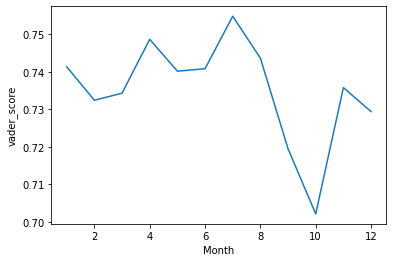

In [659]:
gpm=df_Aus.groupby('Month').mean()
sns.lineplot(x='Month',y='vader_score',data=gpm)

In [437]:
pd.set_option('display.max_colwidth', None)
l_Aus[1].head(20)

,Date,Stars,Title,Review,Month,Year,vader_score,Reviews_clean
0,"['Oct', '2021']",5.0,Experience Nature in an Urban Setting,A great way to experience nature in an urban setting. Nice views of the Austin skyline across the Colorado River. Name is confusing as it is also referred to the Ann and Roy Butler Hike and Bike Trail on maps. Rented a couple e-bikes and headed from our downtown hotel across the Pfluger Pedestrian Bridge and covered a lot of ground making for a relaxing and enjoyable morning. Rode up and down the south side of the river and along Barton Creek.,10,2021,0.9022,a great way to experience nature in an urban setting nice views of the austin skyline across the colorado river name is confusing as it is also referred to the ann and roy butler hike and bike trail on maps rented a couple e bikes and headed from our downtown hotel across the pfluger pedestrian bridge and covered a lot of ground making for a relaxing and enjoyable morning rode up and down the south side of the river and along barton creek
1,"['Jun', '2021']",5.0,Beautiful trail!,Beautiful trail. Places to sit and look at the water. Very busy on the weekends but during the week much calmer. Pack your water bottle and hit the trail!,6,2021,0.7177,beautiful trail places to sit and look at the water very busy on the weekends but during the week much calmer pack your water bottle and hit the trail
2,"['Apr', '2022']",5.0,Lovely and scenic walk,"My friend and I wanted to check out Lady Bird Lake and get exercise at the same time. There was a relatively small area that offered free 2-hour parking near the Hyatt Regency on the lake’s south side. All the trees along the trail provided a lot of shade , welcome on a sunny and warm day. This is a terrific way to take in the Austin scene.",4,2022,0.9460,my friend and i wanted to check out lady bird lake and get exercise at the same time there was a relatively small area that offered free hour parking near the hyatt regency on the lake’s south side all the trees along the trail provided a lot of shade welcome on a sunny and warm day this is a terrific way to take in the austin scene
3,"['Mar', '2022']",5.0,Nice outdoor walk with views,Nice to get some outside time on our Austin visit. Included a walk to the Congress Ave Bridge to see the bats come out at sunset.,3,2022,0.4215,nice to get some outside time on our austin visit included a walk to the congress ave bridge to see the bats come out at sunset
4,"['Apr', '2022']",5.0,Beautiful,On a hot day it is a beautiful walk and great people watching. Not a lot of nature but the fauna is nice and the paths are clean and seem safe,4,2022,0.9442,on a hot day it is a beautiful walk and great people watching not a lot of nature but the fauna is nice and the paths are clean and seem safe
5,"['Mar', '2022']",5.0,"Nature, people and dog watching all in one plce","If you want to exercise, enjoy nature, or watch and interact with the ""natives"" this is the Place. Great view, bridges, joggers, rowers, dogs, nature, birds, all can be found here",3,2022,0.8225,if you want to exercise enjoy nature or watch and interact with the natives this is the place great view bridges joggers rowers dogs nature birds all can be found here
6,"['Dec', '2021']",4.0,Nice place for a walk or a jog along the water,Nice place to stroll or jog along the water. Very accessible from the downtown Austin area. Various points of interest along the way (bat bridge included).,12,2021,0.7003,nice place to stroll or jog along the water very accessible from the downtown austin area various points of interest along the way bat bridge included
7,"['Dec', '2021']",5.0,Bike Ride,"I love a good city running/biking/walking trail and this one is among the best. The views of downtown are incredible, the trail runs along both sides of the river, and they have plenty of bike rentals if you don’t have a bike. I didn’t get to do the whole thing, but really enjoyed it.",12,2021,0.9009,i love a good city running biking walkin

In [100]:
import re
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())




In [108]:
#cleaning reviews
df_Chi['Reviews_clean'] = df_Chi.Review.map(alphanumeric).map(punc_lower)


In [109]:
df_Aus['Reviews_clean'] = df_Aus.Review.map(alphanumeric).map(punc_lower)

In [739]:
df_NYC['Reviews_clean'] = df_NYC.Review.map(alphanumeric).map(punc_lower)

In [113]:
#topic modeling using LSA with CountVectorizer
vect_Chi=CountVectorizer(stop_words='english',min_df=5,max_df=40,ngram_range=(2,2))
doc_term_Chi=vect_Chi.fit_transform(df_Chi.Reviews_clean)


doc_term_Chi.shape

(6781, 3270)

In [114]:
doc_term_Chi_df=pd.DataFrame(doc_term_Chi.toarray(), columns=vect_Chi.get_feature_names())


In [115]:
doc_term_Chi_df.sum().sort_values(ascending=False).head(20)

special exhibit         44
baseball game           43
john hancock            41
day night               40
game wrigley            40
ve seen                 40
tilt experience         40
chicago public          40
christmas trees         39
clear day               39
great day               39
chicago skyline         38
museum great            38
food drink              38
easily spend            37
definitely recommend    37
modern art              36
staff friendly          36
van gogh                36
great exhibits          35
dtype: int64

In [116]:
#look at topics of bad reviews
df_Chi_bad=df_Chi[df_Chi['Stars']<=3]
df_Chi_bad.shape

(521, 8)

In [119]:
vect_Chi_bad=CountVectorizer(stop_words='english',min_df=2,ngram_range=(2,2))
doc_term_Chi_bad=vect_Chi_bad.fit_transform(df_Chi_bad.Reviews_clean)
doc_term_Chi_df_bad=pd.DataFrame(doc_term_Chi_bad.toarray(), columns=vect_Chi_bad.get_feature_names())
doc_term_Chi_df_bad.shape

(521, 799)

In [120]:
doc_term_Chi_df_bad.sum().sort_values(ascending=False).head(20)

magnificent mile     31
willis tower         16
years ago            15
lincoln park         14
art institute        14
field museum         13
park zoo             12
gift shop            11
free zoo             10
purchased tickets     9
wait line             9
zoo free              9
high end              8
worth money           8
sell tickets          8
don know              8
water tower           8
polar bear            8
tilt experience       7
customer service      7
dtype: int64

In [123]:
lsa_Chi_bad=TruncatedSVD(6)
lsa_Chi_bad.fit(doc_term_Chi_bad)

TruncatedSVD(n_components=6)

In [125]:
topic_term_Chi_bad=lsa_Chi_bad.components_


topic_term_Chi_bad
topic_term_Chi_df_bad=pd.DataFrame(topic_term_Chi_bad.round(3), index = ["component_1", "component_2", "component_3", "component_4", "component_5", "component_6"], columns = vect_Chi_bad.get_feature_names())


topic_term_Chi_df_bad

,abandoned lion,able close,able nice,able read,able walk,additional exhibits,admission fee,admission free,afternoon walk,american gothic,...,years time,young kids,zoo better,zoo closed,zoo free,zoo good,zoo guess,zoo lights,zoo park,zoo years
component_1,0.001,0.0,0.002,0.000,0.000,0.001,0.002,0.001,0.004,0.003,...,0.002,0.000,0.000,0.001,0.023,0.003,0.001,0.001,0.000,0.003
component_2,0.005,0.0,0.002,0.001,0.003,0.002,0.004,0.002,-0.000,0.156,...,0.005,0.000,0.001,0.002,0.003,0.003,0.000,0.003,0.001,0.005
component_3,0.048,-0.0,0.003,0.002,-0.000,0.003,0.027,0.040,-0.000,-0.012,...,0.099,0.000,0.005,0.057,0.074,0.060,0.000,0.037,0.005,0.127
component_4,0.002,-0.0,0.007,0.001,-0.000,0.007,0.008,-0.002,0.000,-0.020,...,-0.007,0.000,0.002,-0.004,-0.007,-0.004,0.000,0.002,0.001,-0.009
component_5,0.212,0.0,-0.000,0.003,-0.000,0.004,0.111,-0.008,-0.000,-0.003,...,-0.031,-0.000,-0.001,-0.018,-0.007,-0.011,0.000,-0.011,0.006,-0.039
component_6,-0.005,-0.0,0.005,0.003,0.007,0.013,0.011,0.000,0.002,-0.004,...,-0.003,0.001,0.004,-0.002,0.004,0.005,0.001,0.007,0.004,-0.004


In [126]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [127]:
output=display_topics(lsa_Chi_bad, vect_Chi_bad.get_feature_names(),8,['comp1','comp2','comp3','comp4','comp5','comp6'])


Topic:  comp1
magnificent mile, hancock building, north michigan, mile chicago, mile just, walked magnificent, lot money, stay chicago

Topic:  comp2
special exhibit, art institute, social distancing, timed ticket, american gothic, getting people, sadly museum, minutes special

Topic:  comp3
lincoln park, park zoo, polar bear, taken care, care lincoln, zoo years, exhibits closed, years time

Topic:  comp4
willis tower, bought tickets, observation deck, floor ceiling, great view, great views, save money, hour wait

Topic:  comp5
polar bear, looked like, visiting zoo, enclosures small, animals cared, abandoned lion, bear paced, extremely unhealthy

Topic:  comp6
field museum, years ago, customer service, exhibits museum, cost extra, submarine tour, museum ve, museum just




In [128]:
lsa_Chi_bad.explained_variance_ratio_

array([0.02364748, 0.02085247, 0.01913644, 0.0177116 , 0.01737013,
       0.01310174])

In [467]:
pd.set_option('display.max_colwidth', None)
df_Chi[df_Chi['Month']==4]

,Date,Stars,Title,Review,vader_score,Month,Year,Reviews_clean
0,"['Apr', '2022']",5.0,Great visit to world famous art museum,"Visited the last Monday in April. We arrived at the 11am opening and spent 6 hours there until just before 5pm as we viewed the countless exhibits in each room on every floor - even then, we didn't have nearly enough time to read everything. There are 4 floors including the lower level where the Arts of Egypt displays are located. The Art Institute has the most impressionist works of art outside of Paris, so you must visit this place if you enjoy art and it's history. Unlike some other art museums, the Art Institute allows to get closer to the exhibits in order to properly view them and the lighting was sufficient. I don't believe they allowed backpacks, so we stepped outside briefly to have a snack and drink a bottle of water. It wasn't as crowded as I thought it would be and we were able to walk around without difficulty. They allow photographs, but ask that you not use flash, selfie stick, tripods or video. We used our Citypass tickets to get in which save us on the cost of admission. If you only have one day to visit, I recommend going early because there is really a LOT to see.",0.8715,4,2022,visited the last monday in april we arrived at the opening and spent hours there until just before as we viewed the countless exhibits in each room on every floor even then we didn t have nearly enough time to read everything there are floors including the lower level where the arts of egypt displays are located the art institute has the most impressionist works of art outside of paris so you must visit this place if you enjoy art and it s history unlike some other art museums the art institute allows to get closer to the exhibits in order to properly view them and the lighting was sufficient i don t believe they allowed backpacks so we stepped outside briefly to have a snack and drink a bottle of water it wasn t as crowded as i thought it would be and we were able to walk around without difficulty they allow photographs but ask that you not use flash selfie stick tripods or video we used our citypass tickets to get in which save us on the cost of admission if you only have one day to visit i recommend going early because there is really a lot to see
2,"['Apr', '2022']",5.0,A world of beauty,Prepared to move from one jaw dropping gallery to another. All the paintings you studied in Art Appreciation plus a few hundred more are here. I could wander here for hours. I will add that it is very easy to get lost but every staff member we had to ask directions from was very helpful. I cannot wait to make another visit here.,0.8012,4,2022,prepared to move from one jaw dropping gallery to another all the paintings you studied in art appreciation plus a few hundred more are here i could wander here for hours i will add that it is very easy to get lost but every staff member we had to ask directions from was very helpful i cannot wait to make another visit here
3,"['Apr', '2022']",5.0,Great collection of Art!,"While the Art Institute of Chicago may not be the Louvre, it has a very respectable collection of diverse art in huge, uncluttered galleries. I'm sure one can spend days on end enjoying the many pieces but the brochures have a nice list of art a visitor with limited time can see.",0.7874,4,2022,while the art institute of chicago may not be the louvre it has a very respectable collection of diverse art in huge uncluttered galleries i m sure one can spend days on end enjoying the many pieces but the brochures have a nice list of art a visitor with limited time can see
6,"['Apr', '2022']",5.0,Rainy Day Fun,The Art Institute was a welcome opportunity to slow down and enjoy a great collection of art. There are many varied exhibits from Ancient Egyptian relics to wonderful modern art. I especially enjoyed the fine collection of recognizable impressionists. We spend several hours inside on a rainy day. It was a perfect bre

In [129]:
#Now Explore Austin
df_Aus['Reviews_clean'] = df_Aus.Review.map(alphanumeric).map(punc_lower)

In [130]:
vect_Aus=CountVectorizer(stop_words='english',min_df=5,max_df=100,ngram_range=(2,2))
doc_term_Aus=vect_Aus.fit_transform(df_Aus.Reviews_clean)
doc_term_Aus.shape

(6693, 3407)

In [131]:
doc_term_df_Aus=pd.DataFrame(doc_term_Aus.toarray(), columns=vect_Aus.get_feature_names())
doc_term_df_Aus.sum().sort_values(ascending=False).head(20)

make sure           105
bird lake           102
colorado river      100
congress avenue     100
bird johnson         99
definitely worth     98
guided tour          96
great way            96
live music           96
texas state          94
civil rights         94
capitol building     93
oval office          92
hot day              90
spent hours          89
bats fly             83
great views          82
tour guide           80
lbj library          79
nice place           78
dtype: int64

In [132]:
#look at topics of bad reviews
df_Aus_bad=df_Aus[df_Aus['Stars']<=3]
print(df_Aus_bad.shape)
vect_bad_Aus=CountVectorizer(stop_words='english',min_df=2,ngram_range=(2,2))
doc_term_bad_Aus=vect_bad_Aus.fit_transform(df_Aus_bad.Reviews_clean)
doc_term_df_bad_Aus=pd.DataFrame(doc_term_bad_Aus.toarray(), columns=vect_bad_Aus.get_feature_names())
doc_term_df_bad_Aus.shape
doc_term_df_bad_Aus.sum().sort_values(ascending=False).head(20)

(618, 8)


south congress       28
lady bird            20
great place          15
bats came            14
time year            13
parking lot          12
gift shop            12
nice view            11
bats flying          11
texas history        11
mount bonnell        10
barton springs       10
looks like           10
wildflower center    10
capitol building      9
ve seen               9
nice place            9
worth visit           9
bats did              9
didn come             8
dtype: int64

In [133]:
lsa_bad_Aus=TruncatedSVD(6)
lsa_bad_Aus.fit(doc_term_bad_Aus)
topic_term_bad_Aus=lsa_bad_Aus.components_



In [134]:
topic_term_df_bad_Aus=pd.DataFrame(topic_term_bad_Aus.round(3), index = ["component_1", "component_2", "component_3", "component_4", "component_5", "component_6"], columns = vect_bad_Aus.get_feature_names())

output_Aus=display_topics(lsa_bad_Aus, vect_bad_Aus.get_feature_names(),8,['comp1','comp2','comp3','comp4','comp5','comp6'])




Topic:  comp1
lady bird, street parking, like people, great horned, horned owl, parking crowded, seen better, school kids

Topic:  comp2
wildflower center, flowers bloom, visiting austin, didn pay, beautiful area, members botanical, bloom members, botanical garden

Topic:  comp3
lady bird, ve seen, parking area, native plants, parking lot, oval office, mount bonnell, south congress

Topic:  comp4
parking area, south congress, ve seen, parking lot, mount bonnell, safety issues, car break, nice view

Topic:  comp5
south congress, food trucks, walking south, years ago, great place, congress avenue, austin south, place visit

Topic:  comp6
great place, really nice, like great, looks like, time year, south end, hour sunset, half hour




In [135]:
lsa_bad_Aus.explained_variance_ratio_

array([0.0370252 , 0.01766529, 0.01215046, 0.01315947, 0.01236314,
       0.0101596 ])

In [740]:
#Now explore NYC
vect_NYC=CountVectorizer(stop_words='english',min_df=5,max_df=100,ngram_range=(2,2))
doc_term_NYC=vect_NYC.fit_transform(df_NYC.Reviews_clean)
doc_term_NYC.shape


(6526, 2765)

In [741]:
doc_term_df_NYC=pd.DataFrame(doc_term_NYC.toarray(), columns=vect_NYC.get_feature_names())
doc_term_df_NYC.sum().sort_values(ascending=False).head(20)

place visit             102
observation deck         98
gift shop                94
hudson yards             93
amazing views            89
great experience         88
really enjoyed           88
views city               87
make sure                87
art deco                 86
definitely worth         85
chelsea market           81
great view               80
elevator ride            79
staff friendly           77
times square             74
view city                74
great time               72
definitely recommend     71
time year                71
dtype: int64

In [742]:
#look at topics of bad reviews
df_NYC_bad=df_NYC[df_NYC['Stars']<=3]
print(df_NYC_bad.shape)
vect_bad_NYC=CountVectorizer(stop_words='english',min_df=2,ngram_range=(2,2))
doc_term_bad_NYC=vect_bad_NYC.fit_transform(df_NYC_bad.Reviews_clean)
doc_term_df_bad_NYC=pd.DataFrame(doc_term_bad_NYC.toarray(), columns=vect_bad_NYC.get_feature_names())
doc_term_df_bad_NYC.shape
doc_term_df_bad_NYC.sum().sort_values(ascending=False).head(20)

(546, 8)


empire state          64
new york              55
state building        44
high line             27
customer service      25
observation deck      23
bryant park           21
gift shop             20
waste money           16
skip line             15
felt like             15
ice skating           14
tour guide            14
radio city            14
ice rink              13
world observatory     12
waste time            12
rockefeller center    11
elevator ride         11
skating rink          10
dtype: int64

In [743]:
lsa_bad_NYC=TruncatedSVD(6)
lsa_bad_NYC.fit(doc_term_bad_NYC)
topic_term_bad_NYC=lsa_bad_NYC.components_

In [745]:
topic_term_df_bad_NYC=pd.DataFrame(topic_term_bad_NYC.round(3), index = ["component_1", "component_2", "component_3", "component_4", "component_5", "component_6"], columns = vect_bad_NYC.get_feature_names())

output_NYC=display_topics(lsa_bad_NYC, vect_bad_NYC.get_feature_names(),8,['comp1','comp2','comp3','comp4','comp5','comp6'])




Topic:  comp1
empire state, state building, new york, observation deck, world observatory, gift shop, skip line, observation decks

Topic:  comp2
new york, observation deck, high line, gift shop, world observatory, observation decks, open air, tickets advance

Topic:  comp3
observation deck, gift shop, world observatory, observation decks, open air, value views, waste money, window glare

Topic:  comp4
bryant park, ice skating, skating rink, christmas day, ice rink, christmas tree, wife daughter, times square

Topic:  comp5
gift shop, high line, skip line, waste money, new jersey, worth money, complete waste, new yorker

Topic:  comp6
high line, observation deck, walk high, did enjoy, hudson yards, super crowded, looking forward, state building




In [746]:
lsa_bad_NYC.explained_variance_ratio_

array([0.04459498, 0.02580269, 0.02348669, 0.01766162, 0.01717726,
       0.01703701])

In [136]:
#doing corex exploration for Chicago
from corextopic import corextopic as ct

In [192]:
topics_Chi = topic_model_Chi.get_topics()

for n,topic in enumerate(topics_Chi):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: time, weather, cold, winter, year, ice, great, good, summer, skating
1: time, weather, warm, spend, wish, ahead, taking, explore, slow, party
2: exhibit, museum, tickets, field, did, exhibits, like, line, hours, got


In [194]:
topic_colms_Chi = ['topic'+str(i) for i in range(topic_model_Chi.labels.shape[1])]

predictions_Chi = pd.DataFrame(topic_model_Chi.labels, columns=topic_colms_Chi)
predictions_Chi.head(5)

,topic0,topic1,topic2
0,True,True,True
1,True,True,False
2,False,False,True
3,True,True,False
4,False,False,False


In [195]:

cold_season_perc = predictions_Chi['topic0'].sum()/len(predictions_Chi)
warm_season_perc = predictions_Chi['topic1'].sum()/len(predictions_Chi)


print(f'Percent season Documents: {cold_season_perc}')
print(f'Percent safety Documents: {warm_season_perc}')

Percent season Documents: 0.2501106031558767
Percent safety Documents: 0.23388880696062528


In [404]:
#corex exploration for Austin
#setting new vectorizer to adjust ngram range
vect_Aus_1=CountVectorizer(stop_words='english',ngram_range=(1,1))
doc_term_Aus_1=vect_Aus_1.fit_transform(df_Aus.Reviews_clean)


In [405]:
words_Aus = list(np.asarray(vect_Aus_1.get_feature_names()))

In [408]:
topic_model_Aus = ct.Corex(n_hidden= 4, 
                       words=words_Aus,  
                       seed=1
                       )

topic_model_Aus.fit(doc_term_Aus_1,          
                words= words_Aus,      
                docs= df_Aus.Reviews_clean,  
                anchors=[
                         ['weather','hot','season','warm']
                         
                         
                ],                  ### YOUR ANCHORS HERE
                anchor_strength=15   ### YOUR ANCHOR STRENGTH HERE
                );

In [409]:
topics_Aus = topic_model_Aus.get_topics()

for n,topic in enumerate(topics_Aus):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: hot, weather, season, warm, water, pool, day, cold, springs, spring
1: museum, history, lbj, texas, library, exhibits, exhibit, presidential, state, president
2: bar, hotel, driskill, lobby, music, stay, room, service, drinks, historic
3: bats, bridge, congress, shops, south, restaurants, fly, bat, street, sunset


In [188]:
topic_colms_Aus = ['topic'+str(i) for i in range(topic_model_Aus.labels.shape[1])]

predictions_Aus = pd.DataFrame(topic_model_Aus.labels, columns=topic_colms_Aus)
predictions_Aus.head(5)

,topic0,topic1,topic2,topic3
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,True,False
4,False,False,False,False


In [190]:

season_perc = predictions['topic0'].sum()/len(predictions)
safety_perc = predictions['topic3'].sum()/len(predictions)


print(f'Percent season Documents: {season_perc}')
print(f'Percent safety Documents: {safety_perc}')

Percent season Documents: 0.13506648737486926
Percent safety Documents: 0.23771104138652324


In [813]:
#function that scales 
l_Aus[0]['Stars_Norm']=(l_Aus[0]['Stars']-df_Aus['Stars'].min())/(df_Aus['Stars'].max()-df_Aus['Stars'].min())
l_Aus[0]

,Date,Stars,Title,Review,Month,Year,vader_score,Reviews_clean,Stars_Norm
0,"['Apr', '2022']",3.0,Nothing special,"We had time to kill before a wedding so decided to see the Capital. It’s nothing special or spectacular; I’ve seen much better. If you have time to kill and want to see a state capital, it’s worth it; else skip it.",4,2022,-0.8205,we had time to kill before a wedding so decided to see the capital it’s nothing special or spectacular i’ve seen much better if you have time to kill and want to see a state capital it’s worth it else skip it,0.50
1,"['Oct', '2021']",5.0,Impressive,Impressive building with beautiful surrounding grounds. Didn't get a chance to tour the inside but will try to do that next visit.,10,2021,0.4990,impressive building with beautiful surrounding grounds didn t get a chance to tour the inside but will try to do that next visit,1.00
2,"['Apr', '2022']",5.0,Scavenger Hunt,"Did a self-guided tour of the capital building, used the scavenger hunt list in the lobby. Found lots of history of the building and Texas that we did not know and it took us all over the building. We went to the Visitor’s Center to get it stamped upon completion! Even husband said it was fun!",4,2022,0.6103,did a self guided tour of the capital building used the scavenger hunt list in the lobby found lots of history of the building and texas that we did not know and it took us all over the building we went to the visitor’s center to get it stamped upon completion even husband said it was fun,1.00
3,"['Apr', '2022']",5.0,Another Capitol Visited,We're state capitol junkies and this was did not disappoint. Great history of the state and be sure to go to the visitors center for the film on the second floor.,4,2022,0.0680,we re state capitol junkies and this was did not disappoint great history of the state and be sure to go to the visitors center for the film on the second floor,1.00
4,"['Apr', '2022']",5.0,Good for a relaxing stroll,"Beautiful building and grounds (park), right in downtown. Close to Austin night life, restaurants and hotels.",4,2022,0.5994,beautiful building and grounds park right in downtown close to austin night life restaurants and hotels,1.00
...,...,...,...,...,...,...,...,...,...
695,"['Apr', '2019']",5.0,Worth a visit,Definitely worth a visit. The Dome is magnificent and the rotunda has perfect acoustics when speaking in the center. Very cool! Be sure to learn about the portraits and especially the women governors..,4,2019,0.9489,definitely worth a visit the dome is magnificent and the rotunda has perfect acoustics when speaking in the center very cool be sure to learn about the portraits and especially the women governors,1.00
696,"['Mar', '2019']",4.0,interesting,Very interesting and meaningfull place. Gratis and usefull guided tours every 15minutes. Very nice also the gardens.,3,2019,0.7420,very interesting and meaningfull place gratis and usefull guided tours every very nice also the gardens,0.75
697,"['Apr', '2019']",5.0,Very Impressive,"We took the free tour to see the capital. Both my wife and I wear hearing aids and in most parts of the building it was very hard to understand what the guide was saying. The acoustics in the building are horrible with all of the hard surfaces. That said the building is very impressive and the grounds are beautiful. I loved the door hardware, even the door henges were ornate. Our visit lasted about 2 hours.",4,2019,0.8779,we took the free tour to see the capital both my wife and i wear hearing aids and in most parts of the building it was very hard to understand what the guide was saying the acoustics in the building are horrible with all of the hard surfaces that said the building is very impressive and the grounds are beautiful i loved the door hardware even the door henges were ornate our visit lasted about hours,1.00
698,"['Apr', '2019']",5.0,Captivating Capitol,"Really enjoyed touring the Capitol building. I watched a 13 minute video on the Texas government website 

In [830]:
#function that calculates seasonality score 
def seasons_month(df,num_topics,anchors):
    vect_i=[]
    topic_model_i=[]
    topics_i=[]
    col_names=['Month','Sentiment Score','Sentiment Variance','Seasonality Score','Stars']
    seasons_i=[]
    months_i=[]
    sent_mean_i=[]
    sent_var_i=[]
    stars_mean_i=[]
    
    df['Reviews_clean'] = df.Review.map(alphanumeric).map(punc_lower)
    for j in range(1,13):
        
        vect_j=CountVectorizer(stop_words='english',ngram_range=(1,1))
        doc_term_j=vect_j.fit_transform(df[df['Month']==j].Reviews_clean)
        words_j = list(np.asarray(vect_j.get_feature_names()))
        topic_model_j = ct.Corex(n_hidden= num_topics, 
                               words=words_j,  
                               seed=1
                               )

        topic_model_j.fit(doc_term_j,          
                        words= words_j,      
                        docs= df[df['Month']==j].Reviews_clean,  
                        anchors=anchors,                  
                        anchor_strength=10   
                        );
        topics_j = topic_model_j.get_topics()
        topic_colms_j = ['topic'+str(i) for i in range(topic_model_j.labels.shape[1])]

        predictions_j = pd.DataFrame(topic_model_j.labels, columns=topic_colms_j)
        if predictions_j.empty:
            season_perc=0
            
            
        else:
            season_perc = predictions_j['topic0'].sum()/len(predictions_j)
        
        vect_i.append(vect_j)
        topic_model_i.append(topic_model_j)
        topics_i.append(topics_j)
        average_sent=df[df['Month']==j]['vader_score'].mean()
        var_sent=df[df['Month']==j]['vader_score'].var()
        average_stars=df[df['Month']==j]['Stars'].mean()
        months_i.append(j)
        sent_mean_i.append(average_sent)
        sent_var_i.append(var_sent)
        seasons_i.append(season_perc)
        stars_mean_i.append(average_stars)
        
    seasons_i_df=pd.DataFrame({'Month':months_i,'Sentiment Score':sent_mean_i,'Sentiment Variance':sent_var_i,'Seasonality Score':seasons_i,'Stars':stars_mean_i})
    del months_i,sent_mean_i,sent_var_i,seasons_i,stars_mean_i
    return vect_i,topic_model_i,topics_i,seasons_i_df

        

In [814]:
seasons_Aus

,Month,Sentiment Score,Sentiment Variance,Seasonality Score,Stars
0,1,0.729111,0.150597,0.250000,4.750000
1,2,0.775617,0.055819,0.208333,4.625000
2,3,0.709215,0.130013,0.475410,4.426230
3,4,0.771898,0.095888,0.173913,4.673913
4,5,0.767905,0.076267,0.210526,4.771930
...,...,...,...,...,...
7,8,0.639633,0.149210,0.325581,4.372093
8,9,0.702212,0.144481,0.242424,4.696970
9,10,0.622513,0.176105,0.294118,4.250000
10,11,0.740502,0.056159,0.288462,4.403846


In [750]:
vect_Aus_8,topic_model_Aus_8,topics_Aus_8,seasons_Aus_8=seasons_month(l_Aus[0],4,['weather','hot'])

In [751]:
seasons_Aus_8

,Month,Sentiment Score,Sentiment Variance,Seasonality Score,Stars
0,1,0.729111,0.150597,0.277778,4.750000
1,2,0.775617,0.055819,0.333333,4.625000
2,3,0.709215,0.130013,0.229508,4.426230
3,4,0.771898,0.095888,0.260870,4.673913
4,5,0.767905,0.076267,0.298246,4.771930
5,6,0.826278,0.028206,0.203390,4.779661
6,7,0.730260,0.145430,0.161290,4.693548
7,8,0.776174,0.111791,0.140351,4.596491
8,9,0.802551,0.082778,0.206349,4.634921
9,10,0.790654,0.049738,0.123077,4.646154


<AxesSubplot:xlabel='Sentiment Score', ylabel='Seasonality Score'>

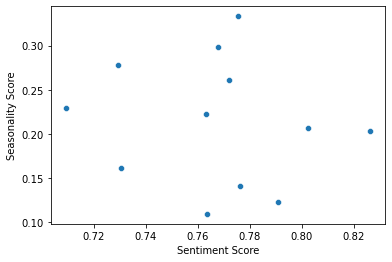

In [282]:
sns.scatterplot(data=seasons_Aus_8,x='Sentiment Score',y='Seasonality Score')

In [831]:
#make a document with seasonality score per month per attraction
def seasonality(l,num_topics,anchors):
    vect=[]
    topic_model=[]
    topics=[]
    seasons=[]
    for i in range(0,len(l)):
        vect_i,topic_model_i,topics_i,seasons_i_df=seasons_month(l[i],num_topics,anchors)
        vect.append(vect_i)
        topic_model.append(topic_model_i)
        topics.append(topics_i)
        seasons.append(seasons_i_df)
    seasons_df=pd.concat(seasons)
    return seasons,seasons_df

In [753]:
seasons_list,seasons_Aus=seasonality(l_Aus,2,[['hot','day','season','cold','heat','warm','cool']])

In [823]:
seasons_list[0]

,Month,Sentiment Score,Sentiment Variance,Seasonality Score,Stars,Stars Norm
0,1,0.729111,0.150597,0.250000,4.750000,0.928450
1,2,0.775617,0.055819,0.208333,4.625000,0.839012
2,3,0.709215,0.130013,0.475410,4.426230,0.696791
3,4,0.771898,0.095888,0.173913,4.673913,0.874009
4,5,0.767905,0.076267,0.210526,4.771930,0.944141
5,6,0.826278,0.028206,0.186441,4.779661,0.949672
6,7,0.730260,0.145430,0.161290,4.693548,0.888058
7,8,0.776174,0.111791,0.210526,4.596491,0.818614
8,9,0.802551,0.082778,0.222222,4.634921,0.846110
9,10,0.790654,0.049738,0.200000,4.646154,0.854148


In [822]:
#
seasons_list[0]['Stars Norm']=(seasons_list[0]['Stars']-seasons_Aus['Stars'].min())/(seasons_Aus['Stars'].max()-seasons_Aus['Stars'].min())

In [837]:
#scaling procedure for Stars column
def scaler(l,df):
    for i in range(0,len(l)):
        l[i]['Stars Norm']=(l[i]['Stars']-df['Stars'].min())/(df['Stars'].max()-df['Stars'].min())
    df['Stars Norm']=(df['Stars']-df['Stars'].min())/(df['Stars'].max()-df['Stars'].min())    
    


In [838]:
scaler(seasons_list,seasons_Aus)

In [839]:
scaler(seasons_Chi_list,seasons_Chi)

In [840]:
scaler(seasons_NYC_list,seasons_NYC)

,Month,Sentiment Score,Sentiment Variance,Seasonality Score,Stars,Stars Norm
0,1,0.297382,0.349288,0.227273,4.909091,0.935407
1,2,0.438993,0.262397,0.129630,4.888889,0.921053
2,3,0.414486,0.316045,0.127451,4.813725,0.867647
3,4,0.473534,0.242035,0.379310,4.793103,0.852995
4,5,0.436163,0.219463,0.315789,4.947368,0.962604
5,6,0.443315,0.309408,0.370370,4.777778,0.842105
6,7,0.404954,0.233593,0.270270,4.837838,0.884780
7,8,0.379289,0.295348,0.368421,4.789474,0.850416
8,9,0.481635,0.280122,0.470588,4.735294,0.811920
9,10,0.469969,0.195848,0.311111,4.933333,0.952632


In [534]:
for i in range(0,len(seasons_list)):
    print(i+1, seasons_list[i]['Seasonality Score'].mean(),seasons_list[i]['Sentiment Score'].mean())

1 0.2181544988680836 0.7671640212769896
2 0.2113881076057885 0.7585817474671149
3 0.20073975310062797 0.7247875499939155
4 0.3741515956011871 0.7437983984799437
5 0.23892403906909934 0.6811032424096215
6 0.2417197862919487 0.7449455767926955
7 0.23042291503568335 0.8065343082310776
8 0.2674656219306 0.601526936910784
9 0.28351718383288055 0.8484515213799297
10 0.2523121616668336 0.6683620592928748


<AxesSubplot:xlabel='Stars', ylabel='Seasonality Score'>

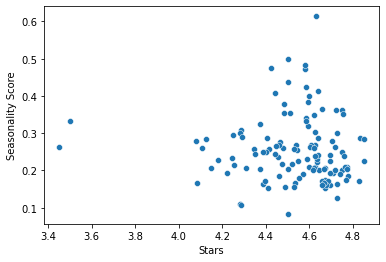

In [756]:
sns.scatterplot(data=seasons_Aus,x='Stars',y='Seasonality Score')

<AxesSubplot:xlabel='Seasonality Score', ylabel='Sentiment Variance'>

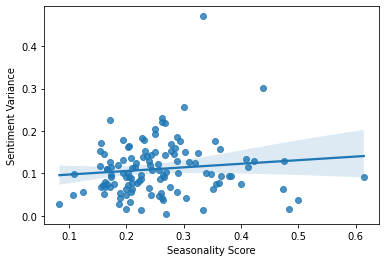

In [450]:
sns.regplot(data=seasons_Aus,x='Seasonality Score',y='Sentiment Variance')

In [779]:

seasons_Chi_list,seasons_Chi=seasonality(l_Chi,2,[['time','cold','warm','freeze','weather']])

<AxesSubplot:xlabel='Seasonality Score', ylabel='Sentiment Score'>

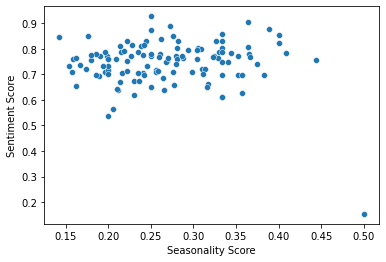

In [538]:
sns.scatterplot(data=seasons_Chi,x='Seasonality Score',y='Sentiment Score')

<AxesSubplot:xlabel='Seasonality Score', ylabel='Sentiment Variance'>

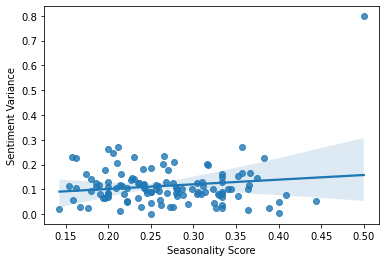

In [539]:
sns.regplot(data=seasons_Chi,x='Seasonality Score',y='Sentiment Variance')

In [331]:
#linear regression analysis


In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm


In [460]:
def LinReg(df):
    X_train,X_test,y_train,y_test=train_test_split(df.drop(['Sentiment Score','Sentiment Variance','Month'],axis=1),
                                                   df['Sentiment Variance'],test_size=0.33,random_state=42)
    model=LinearRegression()
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    MAE=mean_absolute_error(y_test,preds)
    x_incl_cons=sm.add_constant(X_train)
    model_OLS=sm.OLS(y_train,x_incl_cons)
    results=model_OLS.fit()
    results_df=pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,3)})
    print('MAE: ',MAE)
    return results_df

In [541]:
results_Aus=LinReg(seasons_Aus)
results_Aus

MAE:  0.048844393084159256


,coef,pvalue
const,0.078233,0.003
Seasonality Score,0.156045,0.109


In [540]:
results_Chi=LinReg(seasons_Chi)
results_Chi



MAE:  0.05412327212379382


,coef,pvalue
const,0.020438,0.632
Seasonality Score,0.364084,0.020


In [780]:
seasons_NYC_list,seasons_NYC=seasonality(l_NYC,2,[['cold','season','warm','weather']])

<AxesSubplot:xlabel='Seasonality Score', ylabel='Sentiment Variance'>

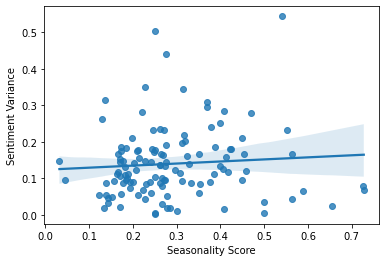

In [493]:
sns.regplot(data=seasons_NYC,x='Seasonality Score',y='Sentiment Variance')

In [542]:
results_NYC=LinReg(seasons_NYC)
results_NYC

MAE:  0.07496757293173736


,coef,pvalue
const,0.121861,0.000
Seasonality Score,0.059731,0.513


In [537]:
seasons_Sea_list,seasons_Sea=seasonality(l_Sea,2,[['time','cold','warm','weather','season']])

<AxesSubplot:xlabel='Seasonality Score', ylabel='Sentiment Score'>

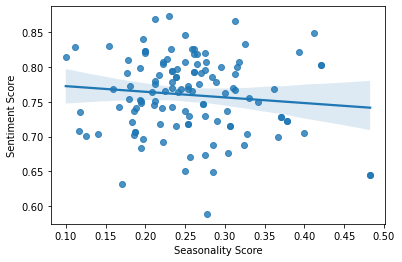

In [543]:
sns.regplot(data=seasons_Sea,x='Seasonality Score',y='Sentiment Score')

In [544]:
results_Sea=LinReg(seasons_Sea)
results_Sea

MAE:  0.032155203147266956


,coef,pvalue
const,0.057735,0.009
Seasonality Score,0.164098,0.042


In [560]:
seasons_Aus.loc[[3],['Sentiment Score']].mean()

Sentiment Score    0.742213
dtype: float64

In [559]:
seasons_Aus

,Month,Sentiment Score,Sentiment Variance,Seasonality Score
0,1,0.729111,0.150597,0.250000
1,2,0.775617,0.055819,0.208333
2,3,0.709215,0.130013,0.475410
3,4,0.771898,0.095888,0.173913
4,5,0.767905,0.076267,0.210526
...,...,...,...,...
7,8,0.639633,0.149210,0.325581
8,9,0.702212,0.144481,0.242424
9,10,0.622513,0.176105,0.294118
10,11,0.740502,0.056159,0.288462


In [834]:
#find seasonality score per month in austin and sentiment score per month.
seasons_cities=[seasons_Aus,seasons_Chi,seasons_NYC]
cities=['Austin','Chicago',"New York City"]
seasons_cities_list=[seasons_list,seasons_Chi_list,seasons_NYC_list]
attr_Aus=['Texas State Capitol','Lady Bird Lake','Mount Bonnel','Barton Springs Pool','LBJ Library',
            'Bullock Museum','The Driskill','Congress Ave Bridge','Lady Bird Johnson Wildflower Center','South Congress Ave']
attr_NYC=['The National 9/11 Museum','The Metropolitan Museum of Art','Central Park','Empire State Building','Top of the Rock',
         'The High Line','One World Observatory','Rockefeller Center','Radio City Music Hall','Bryant Park']
attr_Chi=['Art Institute of Chicago','Museum of Science and Industry','360 Chicago Observation Deck','Millenium Park',
         'Field Museum','Wrigley Field','The Magnificent Mile','Chicago RiverWalk','Lincoln Park Zoo','Chicago Cultural Center']


In [715]:
def city_recommender(month):
    highest_sent=seasons_cities[0].loc[[month-1],['Sentiment Score']].mean().to_list()[0]
    city=cities[0]
    score=0
    for i in range(1,len(seasons_cities)):
        if seasons_cities[i].loc[[month-1],['Sentiment Score']].mean().to_list()[0]>highest_sent:
            highest_sent=seasons_cities[i].loc[[month-1],['Sentiment Score']].mean().to_list()[0]
            city=cities[i]
            score=seasons_cities[i].loc[[month-1],['Seasonality Score']].mean().to_list()[0]
    print('Recommended city in month ',month,' is ',city,' with sentiment score ',highest_sent, 'and seasonality score', score)
        
        
       

In [785]:
from numpy.linalg import norm

In [832]:
def recom_df_cities(month,l):
    sent=[]
    stars=[]
    for i in range(0,len(l)):
        sent_score=l[i].loc[[month-1],['Sentiment Score']].mean().to_list()[0]
        star=l[i].loc[[month-1],['Stars Norm']].mean().to_list()[0]
        sent.append(sent_score)
        stars.append(star)
    recom_df=pd.DataFrame({'Sentiment Score':sent,'Stars Norm':stars})
    return recom_df
    
    
    

In [836]:
seasons_cities[0]

,Month,Sentiment Score,Sentiment Variance,Seasonality Score,Stars
0,1,0.729111,0.150597,0.250000,4.750000
1,2,0.775617,0.055819,0.208333,4.625000
2,3,0.709215,0.130013,0.475410,4.426230
3,4,0.771898,0.095888,0.173913,4.673913
4,5,0.767905,0.076267,0.210526,4.771930
...,...,...,...,...,...
7,8,0.639633,0.149210,0.325581,4.372093
8,9,0.702212,0.144481,0.242424,4.696970
9,10,0.622513,0.176105,0.294118,4.250000
10,11,0.740502,0.056159,0.288462,4.403846


In [841]:
seasons_cities=[seasons_Aus,seasons_Chi,seasons_NYC]
recom_df_cities(3,seasons_cities)

,Sentiment Score,Stars Norm
0,0.725276,0.758612
1,0.711848,0.597261
2,0.665981,0.682970


In [842]:
def city_recommender_2(month):
    
   
    recom_df=recom_df_cities(month,seasons_cities)
    recom_df['Total Score']=recom_df.apply(np.linalg.norm,axis=1)

    city_index=recom_df['Total Score'].idxmax()
    city=cities[city_index]

    print('Recommended city in month ',month,' is ',city,' with total score ', recom_df['Total Score'].max())
        
        
       

In [844]:
recom=recom_df_cities(7,seasons_cities)
recom
recom['new column']=recom.apply(np.linalg.norm,axis=1)
recom

,Sentiment Score,Stars Norm,new column
0,0.773112,0.804672,1.115885
1,0.735416,0.591749,0.943930
2,0.709198,0.776815,1.051857


In [799]:
recom_df=recom_df_cities(3,seasons_cities)
recom_df['Total Score']=recom_df.apply(np.linalg.norm,axis=1)

city_index=recom_df['Total Score'].idxmax()
city=cities[city_index]

print('Recommended city in month ',3,' is ',city,' with total score ', recom_df['Total Score'].max())

Recommended city in month  3  is  Chicago  with total score  4.617441607572583


In [763]:
seasons_cities[0].loc[[3-1],['Sentiment Score']].mean().to_list()[0]

0.7252755030437698

In [771]:
seasons_cities[0].loc[[3-1],['Stars']].mean().to_list()[0]

4.512631285759947

In [722]:
for i in range(1,13):
    
    print(i, seasons_cities[2].loc[[i-1],['Sentiment Score']].mean().to_list()[0])

1 0.6751048181152703
2 0.7174139362748181
3 0.6659806026480409
4 0.6700830027608037
5 0.7470020969456298
6 0.7055292603655453
7 0.709198077293333
8 0.6870019348416109
9 0.7290480970515143
10 0.6812714920087555
11 0.6623345105044111
12 0.6716700538097349


In [716]:
for i in range(1,13):
    city_recommender(i)

Recommended city in month  1  is  Austin  with sentiment score  0.7465189306115757 and seasonality score 0
Recommended city in month  2  is  Chicago  with sentiment score  0.7741762154382449 and seasonality score 0.2664981176745882
Recommended city in month  3  is  Austin  with sentiment score  0.7252755030437698 and seasonality score 0
Recommended city in month  4  is  Austin  with sentiment score  0.7422131392512548 and seasonality score 0
Recommended city in month  5  is  New York City  with sentiment score  0.7470020969456298 and seasonality score 0.3054340524735261
Recommended city in month  6  is  Chicago  with sentiment score  0.7531809965053727 and seasonality score 0.2493229089103996
Recommended city in month  7  is  Austin  with sentiment score  0.7731119665939563 and seasonality score 0
Recommended city in month  8  is  Austin  with sentiment score  0.7484830084233276 and seasonality score 0
Recommended city in month  9  is  Chicago  with sentiment score  0.7546738505657596 

In [843]:
for i in range(1,13):
    city_recommender_2(i)

Recommended city in month  1  is  Austin  with total score  1.0542542158086885
Recommended city in month  2  is  Chicago  with total score  1.0819744078395008
Recommended city in month  3  is  Austin  with total score  1.049531539830648
Recommended city in month  4  is  Austin  with total score  1.0655365889245214
Recommended city in month  5  is  Austin  with total score  1.0485069265638787
Recommended city in month  6  is  Austin  with total score  1.06837753743557
Recommended city in month  7  is  Austin  with total score  1.1158852435550954
Recommended city in month  8  is  Austin  with total score  1.10827325775345
Recommended city in month  9  is  Austin  with total score  1.1211349739883754
Recommended city in month  10  is  Austin  with total score  1.0298364013417622
Recommended city in month  11  is  Austin  with total score  1.0805686548234583
Recommended city in month  12  is  Chicago  with total score  1.011775860470255


In [707]:
#recommend top n attractions in a city based on month
def indexer(city):
    for i in range(0,len(cities)):
        if str(city)==cities[i]:
            index=i
    return index
def indexer_attr(num,city):
    if str(city)=='Austin':
        return attr_Aus[num]
    if str(city)=='Chicago':
        return attr_Chi[num]
    if str(city)=='New York City':
        return attr_NYC[num]
        
def attr_recommender(month,city,top_number):
    attr_sent_list=[]
    attr_index=[]
    attr_names=[] #to do
    season_score=[]
    for j in range(0,10):
        attr_sent=seasons_cities_list[indexer(city)][j].loc[[month-1],['Sentiment Score']].iloc[0].to_list()[0]
        attr_sent_list.append(attr_sent)
        attr_index.append(j)
        
        score=seasons_cities_list[indexer(city)][j].loc[[month-1],['Seasonality Score']].iloc[0].to_list()[0]
        season_score.append(score)
        name=indexer_attr(j,city)
        attr_names.append(name)
        
    attr_df=pd.DataFrame({'Attraction Name':attr_names,'Attraction Index':attr_index,'Sentiment Score':attr_sent_list,'Seasonality Score':season_score}) 
    attr_df=attr_df.sort_values(by='Sentiment Score',ascending=False,ignore_index=True)
    print(attr_df.head(top_number))
        
    
    
            
    

In [685]:
seasons_cities_list[1]

,Month,Sentiment Score,Sentiment Variance,Seasonality Score
0,1,0.794838,0.040327,0.294118
1,2,0.852279,0.024107,0.176471
2,3,0.639403,0.270150,0.212121
3,4,0.741292,0.145735,0.375000
4,5,0.706548,0.180746,0.241379
...,...,...,...,...
7,8,0.765316,0.103942,0.162791
8,9,0.791589,0.082655,0.218750
9,10,0.789288,0.067177,0.235294
10,11,0.801988,0.102375,0.280702


In [718]:
attr_recommender(10,'New York City',5)

         Attraction Name  Attraction Index  Sentiment Score  Seasonality Score
0        Top of the Rock                 4         0.786941           0.176471
1  Radio City Music Hall                 8         0.751762           0.405405
2           Central Park                 2         0.743049           0.200000
3  One World Observatory                 6         0.717536           0.181818
4            Bryant Park                 9         0.714065           0.705882
